In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [17]:
#making a sequential model
model = Sequential()

In [18]:
#adding layers to the model
model.add(Dense(20, input_dim = 3, activation='relu')) #input layer(dense is the number of neurons in the layer), input_dim is the number of features and activation is the activation function
model.add(Dense(1)) #output layer

In [19]:
#compiling the model
#loss is the loss function, optimizer is the optimization algorithm and metrics is the metric to evaluate the model
#mean_squared_error is the loss function used for regression problems
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                80        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras_visualizer import visualizer
#visualizing the model
visualizer(model, file_format='png', view=True)

In [21]:
df = pd.read_csv("co2.csv")

In [8]:
df.head()

,engine,cylandr,fuelcomb,out1
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [9]:
df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


In [22]:
x = df.drop("out1", axis = 1)
y = df["out1"]

In [11]:
x

,engine,cylandr,fuelcomb
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
495,1.5,4,6.9
496,1.5,4,7.5
497,1.5,4,7.7
498,3.5,6,10.6


In [12]:
y

0      196
1      221
2      136
3      255
4      244
      ... 
495    159
496    172
497    177
498    244
499    246
Name: out1, Length: 500, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [24]:
h = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))
#epochs is the number of iterations, batch_size is the number of samples per gradient update and validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch   

Epoch 1/20
40/40 [==============================] - 0s 4ms/step - loss: 73994.3516 - mean_squared_error: 73994.3516 - val_loss: 73751.9297 - val_mean_squared_error: 73751.9297
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 71720.8125 - mean_squared_error: 71720.8125 - val_loss: 71086.8125 - val_mean_squared_error: 71086.8125
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 68717.3750 - mean_squared_error: 68717.3750 - val_loss: 67585.8672 - val_mean_squared_error: 67585.8672
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 64935.3008 - mean_squared_error: 64935.3008 - val_loss: 63406.1719 - val_mean_squared_error: 63406.1719
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 60519.1602 - mean_squared_error: 60519.1602 - val_loss: 58550.3945 - val_mean_squared_error: 58550.3945
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 55469.9766 - mean_squared_error: 55469.9766 - va

In [25]:
Y_predic = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [26]:
Y_predic

array([[308.2557  ],
       [359.08133 ],
       [331.25253 ],
       [172.38724 ],
       [264.25992 ],
       [129.19986 ],
       [233.76965 ],
       [285.6631  ],
       [177.47629 ],
       [326.59085 ],
       [169.17676 ],
       [302.35825 ],
       [180.68677 ],
       [164.63438 ],
       [314.12997 ],
       [347.5898  ],
       [136.75061 ],
       [182.7466  ],
       [164.89613 ],
       [175.33597 ],
       [146.8459  ],
       [214.91098 ],
       [177.73804 ],
       [161.16216 ],
       [157.14326 ],
       [321.2997  ],
       [145.31189 ],
       [306.31747 ],
       [204.14977 ],
       [146.58414 ],
       [319.48077 ],
       [145.51398 ],
       [366.24637 ],
       [321.62112 ],
       [126.049034],
       [145.51398 ],
       [153.87315 ],
       [348.37973 ],
       [283.199   ],
       [261.85785 ],
       [294.76868 ],
       [164.63438 ],
       [203.13925 ],
       [223.27016 ],
       [185.95706 ],
       [160.35376 ],
       [158.21344 ],
       [211.7

In [27]:
y_test

361    368
73     380
374    402
155    218
104    292
      ... 
347    386
86     221
75     437
438    344
15     338
Name: out1, Length: 100, dtype: int64

In [29]:
h.history['loss']

[73994.3515625,
 71720.8125,
 68717.375,
 64935.30078125,
 60519.16015625,
 55469.9765625,
 49944.33984375,
 44082.42578125,
 38146.75,
 32291.6484375,
 26714.810546875,
 21582.080078125,
 17041.984375,
 13097.521484375,
 9854.3876953125,
 7260.21484375,
 5265.06689453125,
 3795.341552734375,
 2764.28564453125,
 2060.643798828125]

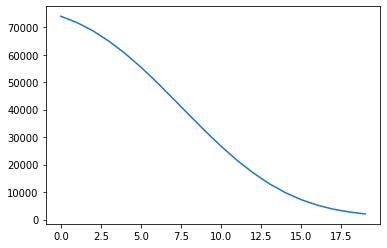

In [30]:
plt.plot(h.history['loss'])